In [1]:
from sys import platform as _platform
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
#if _platform =='linux2':
#    path = '../data/data_sleep/' 
#else:
#    #mets ton path ici et ça devrait marcher :)
#    path = ""
path = "./data/"

In [39]:
#frequencies=pd.read_csv(path+"data_frequences.csv").drop("Unnamed: 0", axis=1)
frequencies=pd.read_csv(path+"fft_eeg.csv")
frequencies_acc =pd.read_csv(path+"ACC_feats.csv")

stats=pd.read_csv(path+"data_stat_feats.csv").drop("Unnamed: 0", axis=1)
stats_ACC=pd.read_csv(path+"ACC_stats.csv").drop("Unnamed: 0", axis=1)
labels=pd.read_csv(path+"challenge_output_data_training_file_sleep_stages_classification.csv", sep=";")

In [3]:
stats_ACC.head()

,centered_ACC_through_0,0_quantile_MSE_ACC,10_quantile_MSE_ACC,20_quantile_MSE_ACC,30_quantile_MSE_ACC,40_quantile_MSE_ACC,50_quantile_MSE_ACC,60_quantile_MSE_ACC,70_quantile_MSE_ACC,80_quantile_MSE_ACC,90_quantile_MSE_ACC,100_quantile_MSE_ACC,mean_MSE_ACC,var_MSE_ACC,skew_MSE_ACC,kurt_MSE_ACC
0,21,31833.087158,49272.108964,52621.858372,58374.171362,65761.010573,71917.264101,80726.246606,90325.761764,96631.535982,123825.187213,1427659.37094,96726.569212,2.528598e+10,8.139612,68.804655
1,1,10.727814,19.996586,23.927627,26.367354,30.625950,33.055753,37.159132,39.820063,52.119842,107.231153,1270077.76030,16986.758953,2.150618e+10,8.660250,74.999949
2,22,10526.673995,36154.080450,42989.353796,49196.293841,56272.589502,70934.628410,82093.025892,92598.070769,109056.355321,140436.342037,1381918.41814,94270.457158,2.434089e+10,7.796648,64.887570
3,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000e+00,0.000000,0.000000
4,1,7.343947,12.343682,15.171806,18.873862,21.197197,23.484917,26.937295,31.153045,37.240224,49.641055,1611528.64759,21513.856442,3.462583e+10,8.660254,74.999999


In [40]:
stats = pd.concat([stats.filter(regex="EEG[0-9]*"),stats_ACC], axis=1)

In [41]:
def select_freq_names(low, high, X_columns, prefix = ''):
    return [name for name in X_columns 
            if len(name.split('q'))==2 
            and name.split('freq')[0] == prefix
            and low<=float(name.split('freq')[1]) 
            and high>= float(name.split('freq')[1])]
def group_frequencies(name, low, high, frequencies, prefix = ''):
    frequencies[name]=(1./(high-low) * (frequencies[select_freq_names(low,high,frequencies.columns,prefix)])).sum(axis=1)

In [42]:
new_feat = ["delta", 'theta', 'alpha1','alpha2', 'beta']
#frequencies["delta"]=frequencies[select_freq_names(0,3,frequencies.columns)].sum(axis=1)
#frequencies["delta"]=frequencies[select_freq_names(0,3.99,frequencies.columns)].sum(axis=1)
#frequencies["theta"]=frequencies[select_freq_names(4,7.5,frequencies.columns)].sum(axis=1)
#frequencies["alpha"]=frequencies[select_freq_names(7.5,13.99,frequencies.columns)].sum(axis=1)
#frequencies["beta"]=frequencies[select_freq_names(14,50,frequencies.columns)].sum(axis=1)

def make_new_feats(frequencies):
    group_frequencies("delta", 0.8, 3.99, frequencies)
    group_frequencies("theta", 4, 7.499, frequencies)
    group_frequencies("alpha1", 7.5, 9.5, frequencies)
    group_frequencies("alpha2", 9.5, 13.99, frequencies)
    group_frequencies("beta", 14, 50, frequencies)
make_new_feats(frequencies)

In [43]:
frequencies_acc.describe()

,Unnamed: 0,0,freq0.0,freq0.0666666666667,freq0.133333333333,freq0.2,freq0.266666666667,freq0.333333333333,freq0.4,freq0.466666666667,freq0.533333333333,freq0.6,freq0.666666666667,freq0.733333333333,freq0.8,freq0.866666666667,freq0.933333333333,freq1.0,freq1.06666666667,freq1.13333333333,freq1.2,freq1.26666666667,freq1.33333333333,freq1.4,freq1.46666666667,freq1.53333333333,freq1.6,freq1.66666666667,freq1.73333333333,freq1.8,freq1.86666666667,freq1.93333333333,freq2.0,freq2.06666666667,freq2.13333333333,freq2.2,freq2.26666666667,freq2.33333333333,freq2.4,freq2.46666666667,freq2.53333333333,freq2.6,freq2.66666666667,freq2.73333333333,freq2.8,freq2.86666666667,freq2.93333333333,freq3.0,freq3.06666666667,freq3.13333333333,freq3.2,freq3.26666666667,freq3.33333333333,freq3.4,freq3.46666666667,freq3.53333333333,freq3.6,freq3.66666666667,freq3.73333333333,freq3.8,freq3.86666666667,freq3.93333333333,freq4.0,freq4.06666666667,freq4.13333333333,freq4.2,freq4.26666666667,freq4.33333333333,freq4.4,freq4.46666666667,freq4.53333333333,freq4.6,freq4.66666666667,freq4.73333333333,freq4.8,freq4.86666666667,freq4.93333333333
count,31129.000000,3.112900e+04,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000
mean,15564.000000,1.633417e+08,1081694.448321,6246.055776,5575.477420,6809.612246,7326.065905,7819.487782,9709.205591,10870.439836,9885.036467,8384.523028,8048.127475,7897.311956,7413.249715,7260.196164,6915.349663,6708.632013,6366.854828,6370.451275,6187.000929,6120.551506,6098.440496,5941.169879,6032.107359,6057.643474,5971.496107,6000.008466,6023.696335,5949.295396,5895.235003,6272.946696,5881.412160,5865.573860,6074.614378,6179.837126,6359.403807,6515.988863,6568.322743,6733.737884,7108.723008,7502.143029,7736.770112,8271.908829,8288.248526,8710.499419,8962.764100,9004.863608,9153.458283,9288.379109,9615.017664,10176.705268,10646.539797,10714.865008,10765.033781,10134.276640,9200.573099,8305.885453,7485.617850,6940.458708,6598.556336,6053.476833,5990.827766,5841.460737,5738.436921,5619.857076,5548.684433,5390.047261,5223.169496,4995.654601,4790.218393,4764.854092,4697.731869,4615.482301,4547.296965,4522.828566,4531.637012
std,8986.312601,1.296389e+08,858506.380825,29177.790936,20701.587537,22617.747830,26367.520633,26981.498750,34003.143914,40699.374176,36577.048928,27941.607838,26418.608280,25946.312530,24386.612168,23729.609083,22717.543315,22261.130351,20987.141926,21087.549435,20459.514809,20187.292307,20021.191993,19591.859916,19775.084191,19796.075377,19658.288424,19783.013322,19835.054632,19547.623606,19435.997705,20865.239071,19485.560359,19457.194114,20209.967400,20722.001059,21381.220813,22159.888671,22133.171159,22788.645569,24269.186384,25931.100318,27002.720582,29270.745105,29274.274739,31279.840791,32193.312188,32647.307309,32896.355490,33054.266575,34065.948439,36226.735088,38306.336504,38719.608217,39286.858218,37235.472611,33943.741572,29835.829533,26260.315476,24039.773048,22667.749803,20620.168555,20572.668628,19956.917884,19391.933595,18982.281600,18714.462784,18279.689011,17483.046046,16616.049858,16036.718628,1

In [8]:
def regroup_acc_freq (frequencies_acc):
    for prefix in ['ACC_X.','ACC_Y.','ACC_Z.']:
        group_frequencies(prefix+"smaller_one",0.01,1, frequencies_acc,prefix)
        group_frequencies(prefix+"one_to_two",1.01,2, frequencies_acc,prefix)
        group_frequencies(prefix+"two_to_three",2.01,3, frequencies_acc,prefix)
        group_frequencies(prefix+"three_to_four",3.01,4, frequencies_acc,prefix)
        group_frequencies(prefix+"more_four",4,10, frequencies_acc,prefix)
#regroup_acc_freq (frequencies_acc)

#prefixes = ['ACC_X.','ACC_Y.','ACC_Z.']
#frequencies_acc = frequencies_acc[[prefix+ x for x in["smaller_one","one_to_two","two_to_three",'more_four']for prefix in prefixes]]

In [57]:
train = pd.concat([
        frequencies[new_feat], 
        stats, 
        #frequencies_acc.drop("Unnamed: 0", axis=1)
    ], axis=1)

In [58]:
train.describe()

,delta,theta,alpha1,alpha2,beta,0_quantile_EEG,10_quantile_EEG,20_quantile_EEG,30_quantile_EEG,40_quantile_EEG,50_quantile_EEG,60_quantile_EEG,70_quantile_EEG,80_quantile_EEG,90_quantile_EEG,100_quantile_EEG,mean_EEG,var_EEG,skew_EEG,kurt_EEG,centered_ACC_through_0,0_quantile_MSE_ACC,10_quantile_MSE_ACC,20_quantile_MSE_ACC,30_quantile_MSE_ACC,40_quantile_MSE_ACC,50_quantile_MSE_ACC,60_quantile_MSE_ACC,70_quantile_MSE_ACC,80_quantile_MSE_ACC,90_quantile_MSE_ACC,100_quantile_MSE_ACC,mean_MSE_ACC,var_MSE_ACC,skew_MSE_ACC,kurt_MSE_ACC
count,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,3.112900e+04,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,3.112900e+04,31129.000000,31129.000000
mean,43379.346974,13380.986171,10436.192508,7810.427290,2818.253073,-67.668904,-24.578816,-15.029817,-9.142491,-4.553969,-0.429837,3.709411,8.344859,14.295154,23.852064,70.926835,-0.307724,8.091409e+03,0.042390,1.888080,2.381702,1948.362582,3432.684774,4186.794219,4834.187472,5461.306690,6116.766175,6851.114819,7777.069504,9129.994406,11854.553249,1081694.448321,21353.492798,2.535125e+10,5.617668,48.345478
std,283395.223148,100010.122134,65039.692153,47325.188288,19907.778963,332.438831,44.725172,16.280377,9.902244,5.071556,1.948052,4.814270,9.619773,15.967630,29.583928,955.988966,0.960328,1.286930e+06,0.536758,4.737300,5.775891,6345.463632,10846.473378,13169.181604,15154.521811,17078.837453,19079.129829,21303.470246,24090.416004,28131.039636,36151.488467,858506.380825,25218.827304,2.362490e+10,4.051698,34.955467
min,6322.290528,2839.570233,2488.058337,1909.686947,733.183142,-57846.411752,-6473.418040,-370.417062,-133.772751,-79.882920,-33.425067,-9.044022,1.006095,1.760171,2.963225,7.786749,-12.641050,6.358505e+00,-9.909720,-1.469313,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,20717.438248,9010.521005,6834.118876,5304.520663,1725.402809,-82.958289,-27.823264,-17.027716,-10.307362,-5.068524,-0.757524,1.227857,3.012414,5.146811,8.339893,26.976275,-0.528154,5.498961e+01,-0.187791,0.122153,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
50%,33601.743420,11411.550337,8865.193597,6942.138178,2054.704165,-47.309534,-14.675546,-8.980321,-5.521182,-2.746643,-0.332591,2.027671,4.745264,8.242451,14.058969,47.394753,-0.315067,1.701812e+02,0.026829,0.685011,1.000000,9.647472,17.230036,20.806311,23.959624,27.156824,30.628211,35.125237,40.949499,50.196932,69.787755,1377156.202930,19874.379454,2.454460e+10,8.660225,74.999666
75%,55944.472094,15094.920164,12152.487994,8964.529673,2749.766834,-27.449899,-9.012322,-5.747950,-3.609769,-1.838396,0.045524,4.116302,9.476140,16.365352,27.402314,82.504026,-0.019021,5.387287e+02,0.261775,1.900467,1.000000,16.998396,29.350354,36.140973,42.374419,49.146478,57.633608,68.166934,81.894625,103.947332,157.436894,1717696.539430,27348.814059,3.933641e+10,8.660253,74.999992
max,49805983.681107,17620750.984793,11448208.252360,8333891.437587,3483159.136385,-7.846800,-3.336069,-2.250318,-1.371010,1.549733,26.079463,74.284299,121.039011,189.060611,2530.299222,168434.316703,14.288895,2.270588e+08,13.196885,305.230097,39.000000,39963.250476,53819.564386,63425.668620,70444.604093,79905.163710,87727.090962,98422.309022,109923.511540,126723.688084,170475.007740,2649178.889340,104651.158899,9.357271e+10,8.660254,75.000000


In [59]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(train)
X_sc = scaler.transform(train)
X_columns = train.columns
X_train, X_test, y_train, y_test = train_test_split(
    X_sc, labels["TARGET"], test_size=0.2, random_state=0)

In [ ]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression(penalty='l2', C=200)
lr.fit(X_train, y_train)
print accuracy_score(lr.predict(X_test),y_test)
print("Score on train data : ", accuracy_score(y_train, lr.predict(X_train)))

In [ ]:
%%time
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
sgd = SGDClassifier(shuffle = True, loss = 'hinge',penalty='l2', alpha = 0.001, n_iter= 150)
sgd.fit(X_train, y_train)
print accuracy_score(sgd.predict(X_test),y_test)
print("Score on train data : ", accuracy_score(y_train, sgd.predict(X_train)))

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import cohen_kappa_score, accuracy_score
rf = RandomForestClassifier(random_state=1, n_estimators=500, max_depth= 20, n_jobs = 3)
rf.fit(X_train, y_train)
predicted_label = rf.predict(X_test)
print("Random Forest - accuracy Score on test_data : ", accuracy_score(y_test, predicted_label))
print("Random Forest - accuracy Score on train_data : ", accuracy_score(y_train, rf.predict(X_train)))
#print("Random Forest - kappa Score on test_data : ", cohen_kappa_score(y_test, predicted_label))
#print("Random Forest - kappa Score on train data : ", cohen_kappa_score(y_train, rf.predict(X_train)))

In [50]:
"""%%time
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(rf, X_train, y_train, cv=5, scoring="accuracy",n_jobs=3)
print("log RMSE: {:.4f} +/-{:.4f}".format(
    np.mean(scores), np.std(scores)))"""

'%%time\nfrom sklearn.cross_validation import cross_val_score\nscores = cross_val_score(rf, X_train, y_train, cv=5, scoring="accuracy",n_jobs=3)\nprint("log RMSE: {:.4f} +/-{:.4f}".format(\n    np.mean(scores), np.std(scores)))'

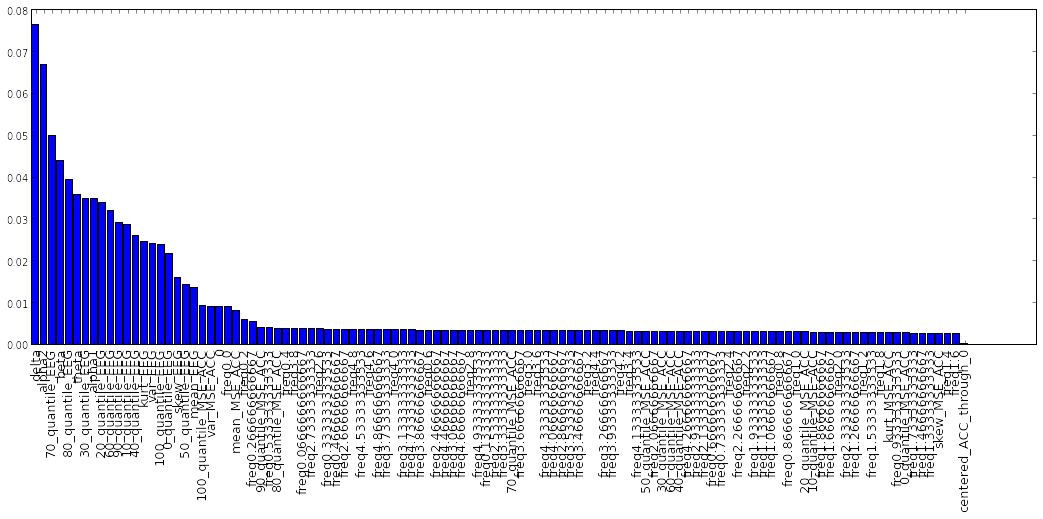

In [55]:
plt.figure(figsize=(18, 6))

ordering = np.argsort(rf.feature_importances_)[::-1]

importances = rf.feature_importances_[ordering]
feature_names = X_columns[ordering]

x = np.arange(len(feature_names))
plt.bar(x, importances)
plt.xticks(x + 0.5, feature_names, rotation=90, fontsize=13);

In [52]:
%%time
from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.metrics import cohen_kappa_score
et = ExtraTreesClassifier(n_estimators=500, max_depth= 29, n_jobs = 3)
et.fit(X_train, y_train)
predicted_label = et.predict(X_test)

print("Extra Random Trees - accuracy Score on test_data : ", accuracy_score(y_test, predicted_label))
print("Extra Random Trees - accuracy Score on train data : ", accuracy_score(y_train, et.predict(X_train)))
#print("Extra Random Trees - kappa Score on test_data : ", cohen_kappa_score(y_test, predicted_label))
#print("Extra Random Trees - kappa Score on train data : ", cohen_kappa_score(y_train, et.predict(X_train)))

('Extra Random Trees - accuracy Score on test_data : ', 0.80565371024734977)
('Extra Random Trees - accuracy Score on train data : ', 0.99538208248002247)
CPU times: user 50.4 s, sys: 248 ms, total: 50.7 s
Wall time: 22.1 s


In [34]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(5)
    plt.xticks(tick_marks, [0,1,2,3,4], rotation=45)
    plt.yticks(tick_marks, [0,1,2,3,4])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


[[ 130    2   90   17   13]
 [   3   16   60    1   15]
 [   4    0 2768  246   78]
 [   0    0  267 1645    0]
 [   1    0  420    6  444]]
Counter({2.0: 3096, 3.0: 1912, 4.0: 871, 0.0: 252, 1.0: 95}) Counter({2.0: 3605, 3.0: 1915, 4.0: 550, 0.0: 138, 1.0: 18})


/usr/lib64/python2.7/site-packages/matplotlib/collections.py:526: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


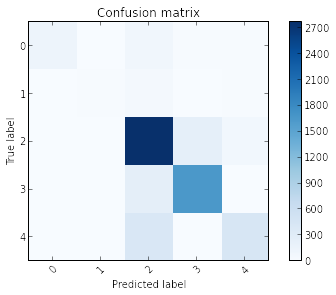

In [35]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, predicted_label)
print cm
plt.figure()
plot_confusion_matrix(cm)

import collections
print collections.Counter(y_test), collections.Counter(predicted_label)


In [26]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import cohen_kappa_score
gb = GradientBoostingClassifier( n_estimators=500, learning_rate=0.03,max_depth= 6)
gb.fit(X_train, y_train)
predicted_label = gb.predict(X_test)

print("GBC - accuracy Score on test_data : ", accuracy_score(y_test, predicted_label))
print("GBC - kappa Score on test_data : ", cohen_kappa_score(y_test, predicted_label))
print("GBC- kappa Score on train data : ", cohen_kappa_score(y_train, gb.predict(X_train)))

('GBC - accuracy Score on test_data : ', 0.86990041760359782)
('GBC - kappa Score on test_data : ', 0.79307762414087002)
('GBC- kappa Score on train data : ', 0.94368400562890009)
CPU times: user 22min 52s, sys: 53.6 ms, total: 22min 52s
Wall time: 22min 56s


[[ 181    2   49    6   14]
 [   4   37   37    0   17]
 [  14    0 2778  164  140]
 [   0    0  178 1728    6]
 [   6    0  170    3  692]]


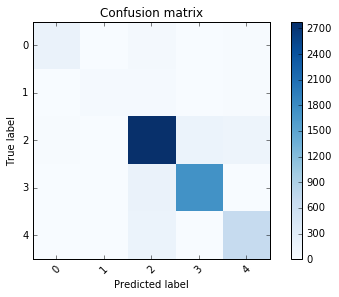

In [27]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, predicted_label)
print cm
plt.figure()
plot_confusion_matrix(cm)

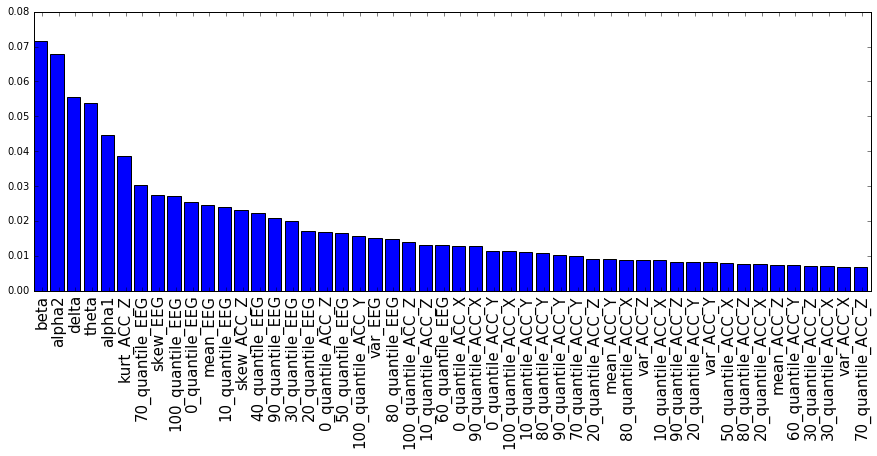

In [28]:
plt.figure(figsize=(15, 5))

ordering = np.argsort(gb.feature_importances_)[::-1][:50]

importances = gb.feature_importances_[ordering]
feature_names = X_columns[ordering]

x = np.arange(len(feature_names))
plt.bar(x, importances)
plt.xticks(x + 0.5, feature_names, rotation=90, fontsize=15);

In [ ]:
%%time
from sklearn.svm import SVC
from sklearn.metrics import cohen_kappa_score
for c in [1000]:
    svc = SVC(cache_size = 1500, C=c, kernel='linear')
    svc.fit(X_train, y_train)
    predicted_label = svc.predict(X_test)
    print "for c =",c
    print("GBC - accuracy Score on test_data : ", accuracy_score(y_test, predicted_label))
    print("GBC - kappa Score on test_data : ", cohen_kappa_score(y_test, predicted_label))
    print("GBC- kappa Score on train data : ", cohen_kappa_score(y_train, svc.predict(X_train)))

In [59]:
%%time
from sklearn.svm import SVC
from sklearn.metrics import cohen_kappa_score
#for c in np.logspace(-4, 6, 10):
    #svc = SVC(cache_size = 1500, C=c)
    #svc.fit(X_train, y_train)
    #predicted_label = svc.predict(X_test)
    #print "for c =",c
    #print("GBC - accuracy Score on test_data : ", accuracy_score(y_test, predicted_label))
    #print("GBC - kappa Score on test_data : ", cohen_kappa_score(y_test, predicted_label))
    #print("GBC- kappa Score on train data : ", cohen_kappa_score(y_train, svc.predict(X_train)))

for c = 0.0001
('GBC - accuracy Score on test_data : ', 0.49726951493735944)
('GBC - kappa Score on test_data : ', 1.1041930593156906e-16)
('GBC- kappa Score on train data : ', 0.0)
for c = 0.00129154966501
('GBC - accuracy Score on test_data : ', 0.49726951493735944)
('GBC - kappa Score on test_data : ', 1.1041930593156906e-16)
('GBC- kappa Score on train data : ', 0.0)
for c = 0.016681005372
('GBC - accuracy Score on test_data : ', 0.60102794731769993)
('GBC - kappa Score on test_data : ', 0.27388813506800813)
('GBC- kappa Score on train data : ', 0.27481994057835929)
for c = 0.215443469003
('GBC - accuracy Score on test_data : ', 0.65242531320269836)
('GBC - kappa Score on test_data : ', 0.38190863943841802)
('GBC- kappa Score on train data : ', 0.3681804402956938)
for c = 2.78255940221
('GBC - accuracy Score on test_data : ', 0.71281721811757148)
('GBC - kappa Score on test_data : ', 0.50082870210479835)
('GBC- kappa Score on train data : ', 0.49960978769847597)
for c = 35.93813663

KeyboardInterrupt: 

[[ 176    3   62    1   10]
 [   6   57   23    1    8]
 [   8    1 2874  145   68]
 [   2    0  176 1733    1]
 [   3    0  247    4  617]]


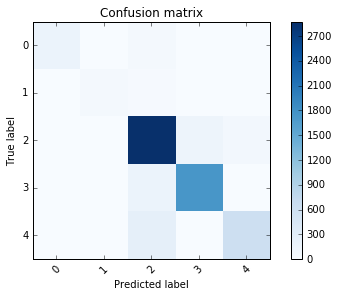

In [17]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, predicted_label)
print cm
plt.figure()
plot_confusion_matrix(cm)


In [85]:
import collections
print collections.Counter(y_test), collections.Counter(predicted_label)


Counter({2.0: 3096, 3.0: 1912, 4.0: 871, 0.0: 252, 1.0: 95}) Counter({2.0: 3394, 3.0: 1889, 4.0: 813, 0.0: 117, 1.0: 13})


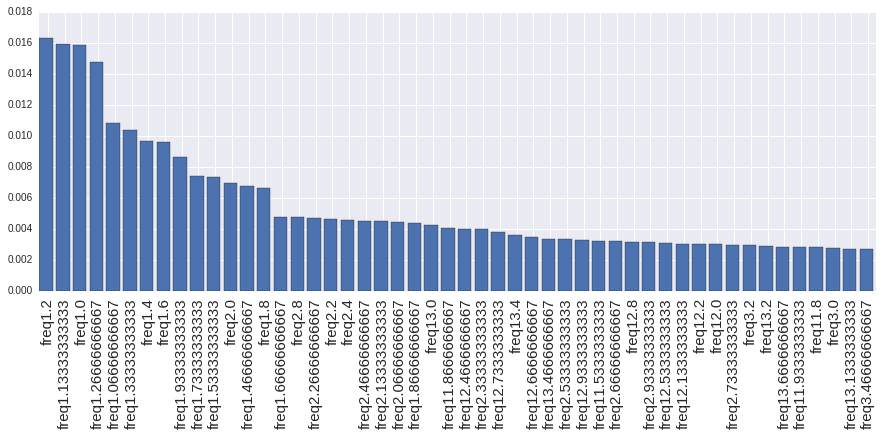

In [88]:
train.describe()

,Unnamed: 0,freq1.0,freq1.06666666667,freq1.13333333333,freq1.2,freq1.26666666667,freq1.33333333333,freq1.4,freq1.46666666667,freq1.53333333333,freq1.6,freq1.66666666667,freq1.73333333333,freq1.8,freq1.86666666667,freq1.93333333333,freq2.0,freq2.06666666667,freq2.13333333333,freq2.2,freq2.26666666667,freq2.33333333333,freq2.4,freq2.46666666667,freq2.53333333333,freq2.6,freq2.66666666667,freq2.73333333333,freq2.8,freq2.86666666667,freq2.93333333333,freq3.0,freq3.06666666667,freq3.13333333333,freq3.2,freq3.26666666667,freq3.33333333333,freq3.4,freq3.46666666667,freq3.53333333333,freq3.6,freq3.66666666667,freq3.73333333333,freq3.8,freq3.86666666667,freq3.93333333333,freq4.0,freq4.06666666667,freq4.13333333333,freq4.2,freq4.26666666667,freq4.33333333333,freq4.4,freq4.46666666667,freq4.53333333333,freq4.6,freq4.66666666667,freq4.73333333333,freq4.8,freq4.86666666667,freq4.93333333333,freq5.0,freq5.06666666667,freq5.13333333333,freq5.2,freq5.26666666667,freq5.33333333333,freq5.4,freq5.46666666667,freq5.53333333333,freq5.6,freq5.66666666667,freq5.73333333333,freq5.8,freq5.86666666667,freq5.93333333333,freq6.0,freq6.06666666667,freq6.13333333333,freq6.2,freq6.26666666667,freq6.33333333333,freq6.4,freq6.46666666667,freq6.53333333333,freq6.6,freq6.66666666667,freq6.73333333333,freq6.8,freq6.86666666667,freq6.93333333333,freq7.0,freq7.06666666667,freq7.13333333333,freq7.2,freq7.26666666667,freq7.33333333333,freq7.4,freq7.46666666667,freq7.53333333333,freq7.6,freq7.66666666667,freq7.73333333333,freq7.8,freq7.86666666667,freq7.93333333333,freq8.0,freq8.06666666667,freq8.13333333333,freq8.2,freq8.26666666667,freq8.33333333333,freq8.4,freq8.46666666667,freq8.53333333333,freq8.6,freq8.66666666667,freq8.73333333333,freq8.8,freq8.86666666667,freq8.93333333333,freq9.0,freq9.06666666667,freq9.13333333333,freq9.2,freq9.26666666667,freq9.33333333333,freq9.4,freq9.46666666667,freq9.53333333333,freq9.6,freq9.66666666667,freq9.73333333333,freq9.8,freq9.86666666667,freq9.93333333333,freq10.0,freq10.0666666667,freq10.1333333333,freq10.2,freq10.2666666667,freq10.3333333333,freq10.4,freq10.4666666667,freq10.5333333333,freq10.6,freq10.6666666667,freq10.7333333333,freq10.8,freq10.8666666667,freq10.9333333333,freq11.0,freq11.0666666667,freq11.1333333333,freq11.2,freq11.2666666667,freq11.3333333333,freq11.4,freq11.4666666667,freq11.5333333333,freq11.6,freq11.6666666667,freq11.7333333333,freq11.8,freq11.8666666667,freq11.9333333333,freq12.0,freq12.0666666667,freq12.1333333333,freq12.2,freq12.2666666667,freq12.3333333333,freq12.4,freq12.4666666667,freq12.5333333333,freq12.6,freq12.6666666667,freq12.7333333333,freq12.8,freq12.8666666667,freq12.9333333333,freq13.0,freq13.0666666667,freq13.1333333333,freq13.2,freq13.2666666667,freq13.3333333333,freq13.4,freq13.4666666667,freq13.5333333333,freq13.6,freq13.6666666667,freq13.7333333333,freq13.8,freq13.8666666667,freq13.9333333333,freq14.0,freq14.0666666667,freq14.1333333333,freq14.2,freq14.2666666667,freq14.3333333333,freq14.4,freq14.4666666667,freq14.5333333333,freq14.6,freq14.6666666667,freq14.7333333333,freq14.8,freq14.8666666667,freq14.9333333333,freq15.0,freq15.0666666667,freq15.1333333333,freq15.2,freq15.2666666667,freq15.3333333333,freq15.4,freq15.4666666667,freq15.5333333333,freq15.6,freq15.6666666667,freq15.7333333333,freq15.8,freq15.8666666667,freq15.9333333333,freq16.0,freq16.0666666667,freq16.1333333333,freq16.2,freq16.2666666667,freq16.3333333333,freq16.4,freq16.4666666667,freq16.5333333333,freq16.6,freq16.6666666667,freq16.7333333333,freq16.8,freq16.8666666667,freq16.9333333333,freq17.0,freq17.0666666667,freq17.1333333333,freq17.2,freq17.2666666667,freq17.3333333333,freq17.4,freq17.4666666667,freq17.5333333333,freq17.6,freq17.6666666667,freq17.7333333333,freq17.8,freq17.8666666667,freq17.9333333333,freq18.0,freq18.0666666667,freq18.1333333333,freq18.2,freq18.2666666667,freq18.3333333333,freq18.4,freq18.4666666667,freq18.5333333333,freq18.6,freq18.6666666667,freq18.7333333333,freq18.8,freq18.8666666667,f

In [89]:
train

Unnamed: 0       freq1.0  freq1.06666666667  freq1.13333333333  \
0               0   9299.957361        7550.448078        5492.248779   
1               1   4795.425675        3726.468638        2259.371319   
2               2   5069.532175        3571.643042        3430.906078   
3               3  12378.461198        6286.325308       16190.004910   
4               4  14235.190892        4291.756639        7766.124846   
5               5   6510.983417        7782.372925        3984.657474   
6               6   3799.750608        7313.834752        4456.655785   
7               7   1849.876905         990.641641        1621.402921   
8               8   2119.933735         821.234425        1504.825676   
9               9   6848.880044       10193.132792        5908.282769   
10             10  21330.517342       18988.722027       28799.256609   
11             11   2499.866073         568.794374        1598.025372   
12             12   5035.009126        5682.709056        3491.608287   
13             13   3712.560428        1993.973254        2382.458668   
14             14   4920.396497        4696.165150        5243.090651   
15             15   2839.065331         479.924168         242.178046   
16             16   3882.085522        3617.406054        1127.442213   
17             17   1248.513020        1838.609125         637.758406   
18             18    959.872910        1404.231275         781.634616   
19             19  12755.426586        3571.700831        6382.983791   
20             20   6620.756929        5640.989844        4241.024786   
21             21   2857.996328        7290.817427        5193.176277   
22             22   2024.301449        2231.709733        2364.971375   
23             23   3860.247442       31306.935168       21443.626013   
24             24   7370.278971        9757.454927       32782.196447   
25             25    465.418163         441.559941         281.961364   
26             26   2890.480906        1687.804169        3077.982646   
27             27   9114.972338        5514.453175        8860.300701   
28             28   3608.634613        1826.587140        2605.840831   
29             29   5173.678569       14087.046913        4440.342305   
...           ...           ...                ...                ...   
31099       31099   2796.078476        4489.576442        5210.053410   
31100       31100   1025.044107        1360.354116         900.343348   
31101       31101    150.461696         969.163188        1454.327750   
31102       31102   6174.172340        4625.326131        4146.502115   
31103       31103   1898.455641        3336.351167        2355.606898   
31104       31104    580.544265         809.529567         311.186579   
31105       31105   1410.826401         564.183183        3350.408913   
31106       31106  10220.699114        4487.354472        9552.192543   
31107       31107  16907.585009       15401.958067        9812.711289   
31108       31108   9443.425465        1230.497266       10276.423519   
31109       31109   8467.491177        2594.001926        9254.593699   
31110       31110    963.234655        3331.165245        3376.310557   
31111       31111   2822.698805         526.659567        2136.147338   
31112       31112   3521.962984        7737.734310        9173.561794   
31113       31113   9024.071039        5072.490757        3879.500247   
31114       31114   3789.709629        3388.737330        3209.070051   
31115       31115    444.854807        2210.618148        2249.686413   
31116       31116   3049.421437        1675.857104        2340.206296   
31117       31117   3039.545209        2847.822971        1665.911896   
31118       31118    917.163537         977.986901        1580.726851   
31119       31119  14750.859784       14650.558795        3587.468959   
31120       31120   2203.680313        1746.011576         308.062444   
31121       31121   2651.088731         945.672845        1147.51

0.609380019274
('Score on train data : ', 0.60077099144681367)


In [121]:
float("freq1.06666666667".split('freq')[1]) <2

True